In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Linear_Regression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, x, y):
        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x.to_numpy()  # Convert DataFrame to numpy array
        self.y = y.to_numpy()  # Convert Series to numpy array
        # Implementing gradient descent
        for i in range(self.epochs):
            self.update_weights()

    def update_weights(self):
        y_prediction = self.predict(self.x)
        # Calculate gradients
        dw = - (2 * (self.x.T).dot(self.y - y_prediction)) / self.m
        sb = - 2 * np.sum(self.y - y_prediction) / self.m
        # Update weights and bias
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * sb

    def predict(self, x):
        return x.dot(self.w) + self.b

# Loading data
salary = pd.read_csv('salary_data.csv')
x = salary.drop(columns='Salary', axis=1)
y = salary['Salary']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

# Model training
model = Linear_Regression(learning_rate=0.02, epochs=1000)
model.fit(x_train, y_train)

# Output results
print('Weight = ', model.w[0])
print('Bias = ', model.b)




Weight =  9514.400999035135
Bias =  23697.406507136307


In [56]:
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


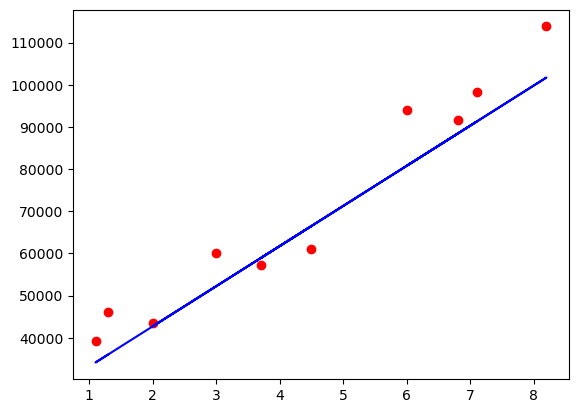

In [57]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, test_data_prediction, color = 'blue')